# <h1><center><strong>$$\color{#4740BF}{\text{Useful Libraries}}$$<strong>











In [ ]:
%%capture  
%pip install IPython
%pip install wordcloud 
%pip install multidict

from IPython.display import Image, HTML, display
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from google.colab import files
from PIL import Image
from os import path
from wordcloud import WordCloud
from plotly.subplots import make_subplots
from collections import Counter
from scipy import stats
from spacy import displacy
from IPython.display import Image

import numpy as np
import pandas as pd
import spacy
import plotly.express as px
import string
import os
import re
import multidict as multidict
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import operator

nlp = spacy.load('en_core_web_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


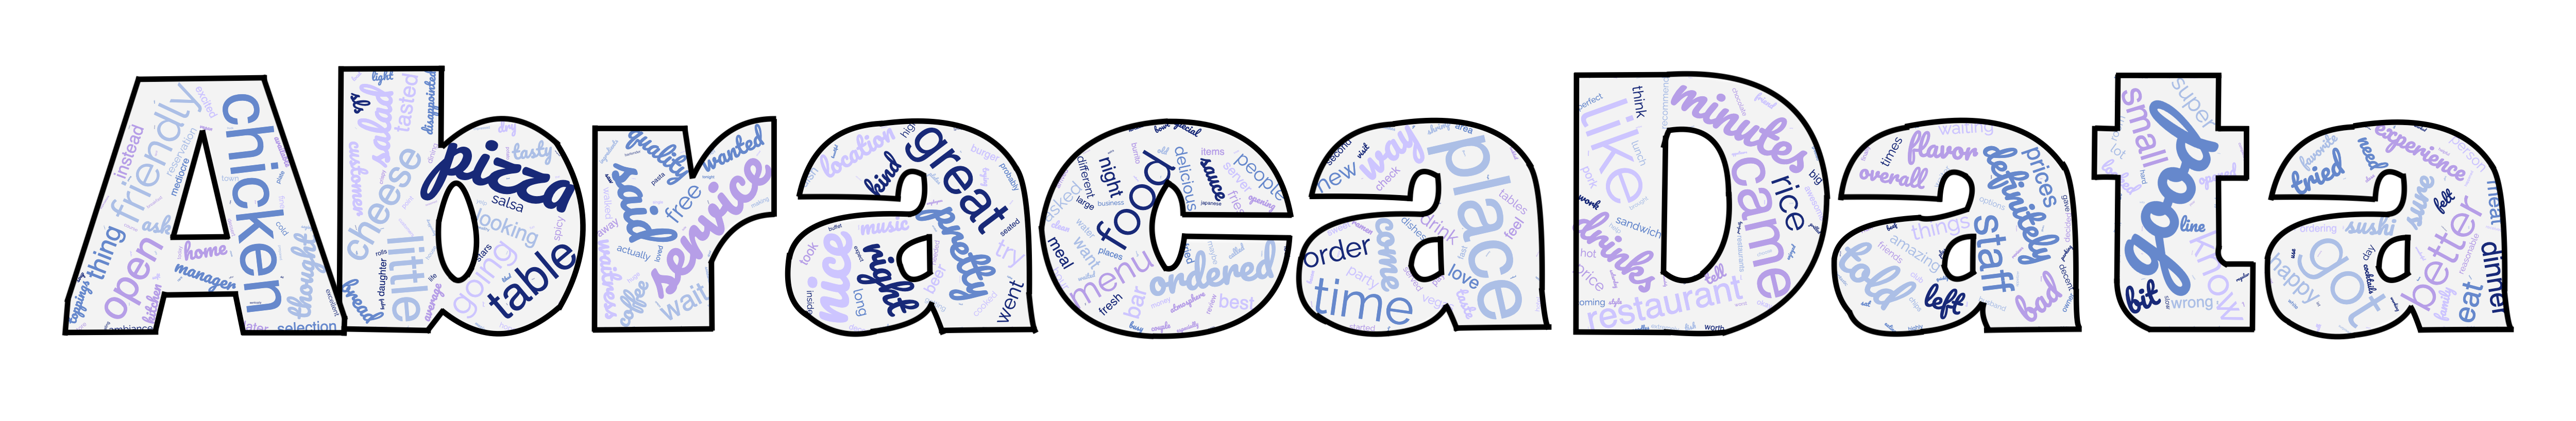

In [ ]:
Image("/content/drive/MyDrive/progetto text mining/Titolo/Inner_transparent.png")

#  <h1><center>$$\color{#4740BF}{\text{Dataset}}$$








The dataset includes user Reviews of Best Restaurants, Shopping, Nightlife, Food, Entertainment, Things to Do and Services published on the website YELP with the corresponding label from 1 to 5. 

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
#train_df = pd.read_csv('/content/drive/MyDrive/progetto text mining/CSV/train.csv', header = None, names = ["label", "review"])
#test_df = pd.read_csv('/content/drive/MyDrive/progetto text mining/CSV/test.csv', header = None, names = ["label", "review"])


The characters "\n" and "\ \n" in the reviews were wrongly considered by `python`, therefore they have been sobstituted such that they are recognized as a request to go in the next line in both the Train and Test datasets.

In [ ]:
#train = train_df.copy(deep=True)
#for i in range(len(train["review"])):
#  new_row = train_df["review"][i].replace(r"\\n", " \n")
#  new_row2 = new_row.replace(r"\n", " \n")
#  new_row3 = new_row2.replace("\"", " ")
#  train["review"][i] = new_row3
  

In [ ]:
#test = test_df.copy(deep=True)
#for i in range(len(test["review"])):
#  new_row = test_df["review"][i].replace(r"\\n", " \n")
#  new_row2 = new_row.replace(r"\n", " \n")
#  new_row3 = new_row2.replace("\"", " ")
#  test["review"][i] = new_row3

In [ ]:
# And then use the following to create the csv file:
#train.to_csv('/content/drive/MyDrive/progetto text mining/CSV/new_new_train.csv', index=False)

In [ ]:
# And then use the following to create the csv file:
#test.to_csv('/content/drive/MyDrive/progetto text mining/CSV/new_new_test.csv', index=False)

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/progetto text mining/CSV/new_new_train.csv')
test = pd.read_csv('/content/drive/MyDrive/progetto text mining/CSV/new_new_test.csv')
frames = [train, test]
df = pd.concat(frames, ignore_index = True)

#  <h1><center>$$\color{#4740BF}{\text{1. Data Exploratory Analysis}}$$







In [ ]:
print("The dimension of the train dataset are:", train.shape, "\nThe dimension of the test set are:", test.shape, 
      "\nThe complete dataset has dimensions:", df.shape)

The dimension of the train dataset are: (650000, 2) 
The dimension of the test set are: (50000, 2) 
The complete dataset has dimensions: (700000, 2)


#  <h1><center>$$\color{#4740BF}{\text{Missing values}}$$


The dataset `df` is made up of both the train and test set. As it possible to notice from the results below there are no Missing Values in the dataset.

In [ ]:
# Check for the existence of NaN values in a cell:
df.isnull().sum()

label     0
review    0
dtype: int64

In [ ]:
blanks = []  # start with an empty list

# (index,label,review text)
for index,label,review in df.itertuples():  # iterate over the DataFrame
    if type(review)==str:            # avoid NaN values
        #print(review.isspace(), index)
        if review.isspace():         # test 'review' for whitespace
            blanks.append(index)     # add matching index numbers to the list
        
blanks

[]

##  <h1><center>$$\color{#4740BF}{\text{Label column}}$$

The label column is perfectly balanced, in fact there are 140000 reviews for each level of label. Also considering the train and test set individually they are still balanced with 130000 reviews for each level of label in the triaining test and 10000 in the test set. 

In [ ]:
df['label'].value_counts()

5    140000
4    140000
3    140000
2    140000
1    140000
Name: label, dtype: int64

In [ ]:
train['label'].value_counts()

5    130000
4    130000
3    130000
2    130000
1    130000
Name: label, dtype: int64

In [ ]:
df['label'].describe()

count    700000.000000
mean          3.000000
std           1.414215
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: label, dtype: float64

In [ ]:
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

fig = px.histogram(train,
             x = "label",
             color = "label",
             color_discrete_sequence=["#45BDB2","#48A7BF", "#7B48C1","#A24BC4","#C64EC4"]
                   )
fig.update_layout(bargap=0.30,
                  title_text='Histogram of Labels', # title of plot
                  xaxis_title_text='Labels', # xaxis label
                  yaxis_title_text='Count', 
                  title_x=0.5,
                  showlegend=False,
                  autosize=False,
                  width=500,
                  height=300) 
fig.show()

##  <h1><center>$$\color{#4740BF}{\text{Stopwords}}$$

Stopwords are a list of words that are not important for our purposes and for that reason are removed from the dataset. In our specific case we decided to remove a costumized list of words that are not useful for our analysis (for instance "eg", "etc", "fill", "find" and "fire"). Moreover, NLP has a list of embedded stopwords that we checked and modified removing some words that we considered useful for our analysis such as: "no", "but", "many", "top", "most", "mostly", "against", "few", "not", "never", "except","more", "cannot", "last", "much", "nobody" and "serious". 




In [ ]:
#Our StopWords
my_stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'all', 'almost', \
                'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', \
                'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', \
                'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', \
                'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',  'by', \
                'can',  'co', 'con', 'could',  'de', 'describe', 'detail', 'do', 'done', \
                'down', 'due', 'during', 'each', 'eg', 'either', 'else', 'elsewhere', \
                'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere',  'few', \
                'fill', 'find', 'fire', 'first', 'for', 'former', 'formerly', 'forty', 'found', 'from', \
                'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her', \
                'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', \
                'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', 'its', \
                'itself', 'keep', 'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made', 'many', 'may', 'me', \
                'meanwhile', 'might', 'mill', 'mine', 'moreover', 'most', 'mostly', 'move',  'must', 'my', \
                'myself', 'name', 'namely', 'neither', 'nevertheless',  'none', \
                'noone', 'nor', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'only', \
                'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', \
                'per', 'perhaps', 'please', 'put', 'rather', 're', 'same', 'see', 'seem', 'seemed', 'seeming', 'seems', \
                'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'so', 'some', \
                'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system', 'take', \
                'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', \
                'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thick', 'thin', 'this', 'those', \
                'through', 'throughout', 'thru', 'thus', 'to', 'together', 'top', 'toward', \
                'towards', 'un', 'under', 'until', 'up', 'upon', 'us', 'via', 'was', "were", "have", "has", \
                'we', 'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', \
                'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', \
                'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', \
                'yourself', 'yourselves', 'he', 'i', 'you', "it", "we", "they","me", "my", "was", "is", "be", \
                "\n", "...", "\n\n","---", "--", " ", "\\", "\"", "\\\\" ]

In [ ]:
#Adding numbers from 1 to 100 and punctuation in the list of stopwords
new_stopword = []
import string
for word in my_stopwords:
    if (nlp.vocab[str(word)].is_stop)==False:
        new_stopword.append(word)
for i in string.punctuation:
    if (nlp.vocab[str(i)].is_stop)==False:
        new_stopword.append(i)
for j in range(0,101):
  if (nlp.vocab[str(j)].is_stop)==False:
        new_stopword.append(j)

print(new_stopword)

['amoungst', 'bill', 'co', 'con', 'de', 'describe', 'detail', 'eg', 'etc', 'fill', 'find', 'fire', 'found', 'hasnt', 'ie', 'inc', 'interest', 'ltd', 'mill', 'sincere', 'system', 'thick', 'thin', 'un', '\n', '...', '\n\n', '---', '--', ' ', '\\', '"', '\\\\', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [ ]:
len(nlp.Defaults.stop_words) #check number of stopwords before

326

In [ ]:
#Update list of stopwards of NLP
for word in new_stopword:
    nlp.Defaults.stop_words.add(str(word))

for word in nlp.Defaults.stop_words:
  nlp.vocab[word].is_stop = True

In [ ]:
len(nlp.Defaults.stop_words) #check number of stopwords after updating it

490

In [ ]:
nlp.vocab['not'].is_stop

True

In [ ]:
non_stop =["no","but","many","top","most","mostly","against","few","not","system","never","except","more",
           "cannot","last","much","nobody","serious"]
for i in non_stop:
  nlp.Defaults.stop_words.remove(i) #removing non_stop words from NLP stopwords 

In [ ]:
'not' in nlp.Defaults.stop_words

False

We removed from a copy of our dataset (test, train and df) all the words that were in out costumized list of stopwords. For doing that we first tokenized the reviews, we removed the stopwords from the tokens and finally we join again the remaining tokens.

In [ ]:
train2 = train.copy(deep=True)

In [ ]:
#Create our list of stopwords
stop_words = nlp.Defaults.stop_words

#Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

#Creating our tokenizer function
def spacy_tokenizer(sentence):
    #Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    #Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    #Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words]

    #return preprocessed list of tokens
    return mytokens

In [ ]:
#for i in range(len(train2)):
#  tokens = spacy_tokenizer(train2["review"][i])
#  new_text = " ".join(tokens)
#  train2["review"][i] = new_text

In [ ]:
#train2.to_csv('/content/drive/MyDrive/progetto text mining/CSV/new_train2.csv', index=False)

In [ ]:
#Import text without stopwords
train2 = pd.read_csv('/content/drive/MyDrive/progetto text mining/CSV/new_train2.csv')

Below there are two examples of a review before removing the stopwords and after:

In [ ]:
print("BEFORE: \n", train["review"][1013], "\nAFTER\n", train2["review"][1013], sep = "")

BEFORE: 
Emailed and called several times to get a pricing on having several services done at once as a graduation present to myself. I was put on hold twice and never picked back up. Emails went unanswered.  :( 
 
I was going to have SO MUCH done, too!! Hair cut, color with highlights, spa manicure/pedicure and an hour massage! All as a graduation present to myself but if they can't be attentive to prospective customers then I can't imagine that they'd be attentive in the store. I'll spend my money elsewhere!
AFTER
emailed called times pricing having services graduation present hold twice never picked emails went unanswered :( going much hair cut color highlights spa manicure pedicure hour massage graduation present but not attentive prospective customers not imagine attentive store spend money


In [ ]:
print("BEFORE: \n", train["review"][1014], "\nAFTER\n", train2["review"][1014], sep = "")

BEFORE: 
A
AFTER
nan


As it is possible to notice from the second example, when removing the stopwords some reviews (37) became empty strings, for that reason we removed them from the datasets. 

In [ ]:
train2.isnull().sum()

label      0
review    37
dtype: int64

In [ ]:
train2.dropna(inplace=True)
train2.reset_index(drop=True, inplace=True)
train2.isnull().sum()

label     0
review    0
dtype: int64

Now we do the same operations for the test dataset:

In [ ]:
#test2 = test.copy(deep=True)

In [ ]:
#for i in range(len(test2)):
#  tokens = spacy_tokenizer(test2["review"][i])
#  new_text = " ".join(tokens)
#  test2["review"][i] = new_text

In [ ]:
#test2.to_csv('/content/drive/MyDrive/progetto text mining/CSV/new_test2.csv', index=False)

In [ ]:
#Import text without stopwords
test2 = pd.read_csv('/content/drive/MyDrive/progetto text mining/CSV/new_test2.csv')

In [ ]:
test2.isnull().sum()

label     0
review    1
dtype: int64

In [ ]:
test2.dropna(inplace=True)
test2.reset_index(drop=True, inplace=True)

In [ ]:
test2.head()

label                                             review
0      1  got new tires weeks got flat took car local me...
1      1  not waste time different people come house est...
2      1  worst people place lunch place freezing loaded...
3      1  restaurant twice disappointed times not time h...
4      1  food not good husband ate couple weeks ago tim...

##  <h1><center>$$\color{#4740BF}{\text{Most common words}}$$ 

In this paragraph we showed the word clouds with the most common tokens for the whole trianing set and for each level of labels. The results are computed on the dataframe were the stopwords were removed. 

In [ ]:
#Creation of a string with all the tokens of the training set
compl = ""
for t in train2["review"]:
    compl = compl + str(t) 
print(len(compl))

264082595


In [ ]:
#Creation of a string with all the tokens of the training set with label = 5
compl5 = ""
for t in range(len(train2["review"])):  
  if train2["label"][t] == 5:
    compl5 = compl5 + str(train2["review"][t]) 

print(len(compl5))

42780971


In [ ]:
#Creation of a string with all the tokens of the training set with label = 4
compl4 = ""
for t in range(len(train2["review"])):  
  if train2["label"][t] == 4:
    compl4 = compl4 + str(train2["review"][t]) 

print(len(compl4))

50162718


In [ ]:
#Creation of a string with all the tokens of the training set with label = 3
compl3 = ""
for t in range(len(train2["review"])):  
  if train2["label"][t] == 3:
    compl3 = compl3 + str(train2["review"][t]) 

print(len(compl3))

55018733


In [ ]:
#Creation of a string with all the tokens of the training set with label = 2
compl2 = ""
for t in range(len(train2["review"])): 
  if train2["label"][t] == 2:
    compl2 = compl2 + str(train2["review"][t]) 

print(len(compl2))

58992302


In [ ]:
#Creation of a string with all the tokens of the training set with label = 1
compl1 = ""
for t in range(len(train2["review"])):  
  if train2["label"][t] == 1:
    compl1 = compl1 + str(train2["review"][t]) 

print(len(compl1))

57127871


In [ ]:
#Frequency of tokens
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}
    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

In [ ]:
def makeImage(text, lab):
    wc = WordCloud(max_font_size=200, max_words=1000, background_color="white")
    # generate word cloud
    wc.generate_from_frequencies(text)
    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    if lab != 0:
      title_ = "Word cloud for label " + str(lab)
      plt.title(title_,  
                fontsize=20, 
                fontweight="bold", 
                color='#2F5F8C', 
                loc='center')
    else:
      title_ = "Word cloud for the entire dataset"
      plt.title(title_,  
                fontsize=20, 
                fontweight="bold", 
                color='#2F5F8C', 
                loc='center')
    plt.show()


In [ ]:
COMPL = [compl, compl1, compl2, compl3, compl4, compl5]

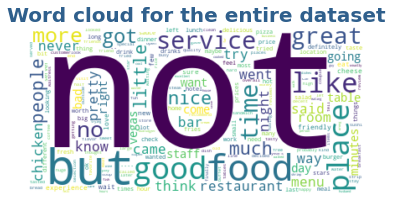

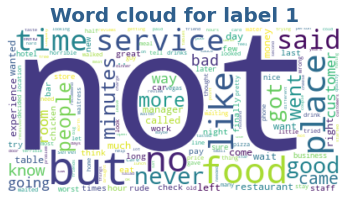

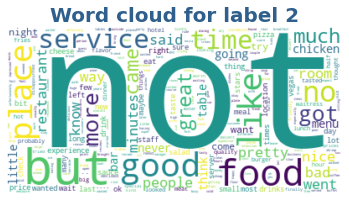

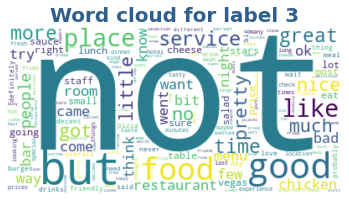

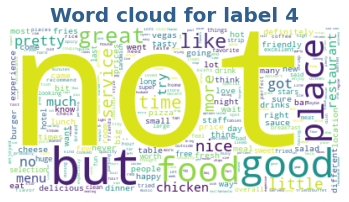

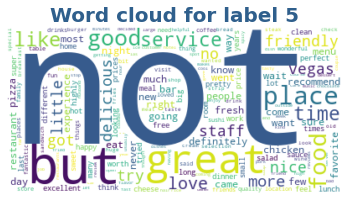

In [ ]:
#Cloud for each level of label and for the entire dataset
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

for i in COMPL:
  makeImage(getFrequencyDictForText(i),  COMPL.index(i))

As it is possible to notice, the words "not" and "but" seem to be the most frequent for each level of labels, anyway there are some frequent words that change depending on the label. For example, in the word cloud 1, the token "never" seems to appear quite frquently. In the wordcloud for label 2 the words "no" and "pretty" are quite frequent. The word "bad" is present in a quite big dimension only in the wordclouds for labels 1 and 2. In the wordcloud for label 3 are shown words with both positive and negative meaning such as "good", "no" and "ok". For labels 4 and 5 the tokens "great", "like", "good" and "delecious" are bigger than in the otheres labels' wordclouds. 

After this qualitative analysis we performed a more quantitative analysis considering the 10 most frequent words in the whole training set:

In [ ]:
frequency_words = getFrequencyDictForText(compl) #Frequency of tokens for the entire dataset

In [ ]:
sortedDict_of_freq = sorted(frequency_words.items(), key=lambda x: x[1], reverse=True)

most_common = []
for i in range(10):
  most_common.append(sortedDict_of_freq[i][0])

In [ ]:
Commonwords = pd.DataFrame(data=None,columns= ["Common_words", "Label", "Freq", "Perc(%)"])
Commonwords["Common_words"] = most_common*5

In [ ]:
#histogram with frequency
COMPL = [compl1, compl2, compl3, compl4, compl5]
#for i in COMPL:
#  frequency_words_sub = getFrequencyDictForText(i)
#  for id_word in range(COMPL.index(i)*10, COMPL.index(i)*10 + len(most_common)):
#    word = Commonwords["Common_words"][id_word]
#    Commonwords["Label"][id_word] = str(COMPL.index(i)+1)
#    Commonwords["Freq"][id_word] = frequency_words_sub.get(word)
#    Commonwords["Perc(%)"][id_word] = round((frequency_words_sub.get(word)/frequency_words.get(word))*100, 2)

In [ ]:
#Commonwords.to_csv('/content/drive/MyDrive/progetto text mining/Titolo/Commonwords.csv', index=False)
Commonwords = pd.read_csv('/content/drive/MyDrive/progetto text mining/Titolo/Commonwords.csv')

The 10 most common words are: *'not', 'but', 'food', 'good', 'place', 'like', 'service', 'time', 'great'* and *'no'*.


In [ ]:
Commonwords.head()

Common_words  Label    Freq  Perc(%)
0          not      1  325122    26.09
1          but      1  123285    16.68
2         food      1   74736    19.74
3         good      1   41699    11.12
4        place      1   64455    18.80

In [ ]:
Commonwords["Label"] = Commonwords["Label"].astype('str')

From the plot below it is possible to observe that the words "not" and "no" are most common in label with low levels. The same happens for the words "time" and "service" probabily because this word is used when complaining about waiting time or for quality of the service.
As regards the word "great" this is the only one that is clearly more frequent in the positive review. A strange result is the fact that the words "good" and "like" are quite balanced, probably because they are combined with a negation in the negative reviews. 

In [ ]:
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
fig = px.bar(Commonwords,  
             x = "Common_words",
             y = "Freq",  
             color = "Label", 
             barmode = 'group', 
             hover_data=["Perc(%)", "Freq"],
             color_discrete_map={"5": "#45BDB2", 
                                 "4": "#48A7BF", 
                                 "3": "#7B48C1",
                                 "2": "#A24BC4", 
                                 "1":"#C64EC4"}
             )
fig.update_layout(bargap=0.30,
                  title_text='Histogram of Most common words in the reviews', # title of plot
                  xaxis_title_text='Words', # xaxis label
                  yaxis_title_text='Frequency for each word',
                  title_x=0.5,
                  autosize=False,
                  width=1200,
                  height=500) 
fig.show()

##  <h1><center>$$\color{#4740BF}{\text{Comparison between reviews with label 1 and label 5}}$$

In [ ]:
#Creation of a list of tokens for the reviews with label 1
temp_df1 = train2[train2['label']==1]
temp_df1.reset_index(drop=True, inplace=True)
my_doc_nlp1 = []
for i in range(temp_df1.shape[0]): 
  doc1 = nlp(temp_df1["review"][i])
  my_doc_nlp1.append(doc1)
  if i % 10000 == 0:
    print(i, "of", temp_df1.shape[0])

0 of 129986
10000 of 129986
20000 of 129986
30000 of 129986
40000 of 129986
50000 of 129986
60000 of 129986
70000 of 129986
80000 of 129986
90000 of 129986
100000 of 129986
110000 of 129986
120000 of 129986


In [ ]:
#Creation of a list of tokens for the reviews with label 5
temp_df5 = train2[train2['label']==5] #dataset with only reviews with label = 5
temp_df5.reset_index(drop=True, inplace=True)
my_doc_nlp5 = []
for i in range(temp_df5.shape[0]): 
  doc1 = nlp(temp_df5["review"][i])
  my_doc_nlp5.append(doc1)
  if i % 10000 == 0:
    print(i, "of", temp_df5.shape[0])

0 of 129993
10000 of 129993
20000 of 129993
30000 of 129993
40000 of 129993
50000 of 129993
60000 of 129993
70000 of 129993
80000 of 129993
90000 of 129993
100000 of 129993
110000 of 129993
120000 of 129993


###  <h1><center>$$\color{#4740BF}{\text{Reviews length}}$$

In [ ]:
#length_rev_lab1 = [] #string with lengths of each reviw for label 1
#for i in range(len(my_doc_nlp1)): 
#  tokens = nlp(temp_df1["review"][i])
#  tokens = my_doc_nlp1[i]
#  length_rev_lab1.append(len(tokens))

In [ ]:
#len_frequ1 = pd.Series(length_rev_lab1).value_counts().reset_index().rename(columns= {"index": "x"})

In [ ]:
#length_rev_lab5 = []  #string with lengths of each reviw for label 5
#for i in range(len(my_doc_nlp5)): 
#  tokens = my_doc_nlp5[i]
#  length_rev_lab5.append(len(tokens))

In [ ]:
 #Table with review's length and corresponding frequency 
 #len_frequ5 =  pd.Series(length_rev_lab5).value_counts().reset_index().rename(columns= {"index": "x"})

In [ ]:
#len_frequ1.to_csv('/content/drive/MyDrive/Colab Notebooks/progetto text mining/CSV/len_frequ1.csv', index=False)
#len_frequ5.to_csv('/content/drive/MyDrive/Colab Notebooks/progetto text mining/CSV/len_frequ5.csv', index=False)

In [ ]:
#Import frequency
len_frequ1 = pd.read_csv('/content/drive/MyDrive/progetto text mining/CSV/len_frequ1.csv')
len_frequ5 = pd.read_csv('/content/drive/MyDrive/progetto text mining/CSV/len_frequ5.csv')
len_frequ5 = len_frequ5.rename(columns={'0': 'Freq', "x": "Len"})
len_frequ1 = len_frequ1.rename(columns={'0': 'Freq', "x": "Len"})
len_frequ1.reset_index(drop=True, inplace=True)
len_frequ5.reset_index(drop=True, inplace=True)

In [ ]:
tot_senteces5 = sum(len_frequ5["Freq"])
len_frequ5["Percent"] = len_frequ5["Freq"]/tot_senteces5
tot_senteces1 = sum(len_frequ1["Freq"])
len_frequ1["Percent"] = len_frequ1["Freq"]/tot_senteces1

In [ ]:
pd.options.mode.chained_assignment = None
len_frequ1.sort_values(by=['Percent'], ascending=False)
for i in range(len_frequ1.shape[0]):
  x = len_frequ1["Percent"].iloc[i]
  st = f"{x:.3%}"

  len_frequ1["Percent"][i] = st

len_frequ1.head()

Len  Freq Percent
0   22  1764  1.357%
1   21  1748  1.345%
2   25  1742  1.340%
3   18  1735  1.335%
4   24  1692  1.302%

In [ ]:
pd.options.mode.chained_assignment = None
len_frequ5.sort_values(by=['Percent'], ascending=False)
for i in range(len_frequ5.shape[0]):
  x = len_frequ5["Percent"].iloc[i]
  st = f"{x:.3%}"
  len_frequ5["Percent"][i] = st

len_frequ5.head()

Len  Freq Percent
0   16  2490  1.915%
1   15  2487  1.913%
2   19  2477  1.905%
3   12  2427  1.867%
4   17  2424  1.865%

As it is possible to notice from the double plots below, most of the reviews (both with label 1 and 5) have a length around 18, even if, to be more precise, the positive reviews seems to be longer (most frequent length = 22 tokens) compared with the revies with label = 5 (most frequent length = 16 tokens).

Another difference is the fact that the lengths of the positive reviews are more concentrated meaning that the most frequent lengths corresponds almost to 2% of the whole lengths, while in labels 1, the most frequent length corresponds to 1.35%. 

In label 1 the the review with with more tokens, has 573, while in label 5, 595 tokens. It is important to remember that these insights are evaluated on the reviews once removed the stopwords. 

In [ ]:
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

fig1 = make_subplots(rows=2, cols=1, subplot_titles = ("Label 1", "Label 5"))

fig1.append_trace(
    go.Bar(
    x = list(len_frequ1["Len"]), 
    y = list(len_frequ1["Freq"]),
    marker_color='#C64EC4'
    ), 
    row=1, col=1
    )

fig1.append_trace(go.Bar(
    x = list(len_frequ5["Len"]), 
    y = list(len_frequ5["Freq"]),
    marker_color='#48A7BF')
    , 
    row=2, col=1
    )

fig1.update_layout(height=600, width=1000, title_x=0.5,
                  title_text="Review length for different labels", showlegend= False)
fig1.show()

##  <h1><center>$$\color{#4740BF}{\text{Part of Speech Tagging, Syntactic Analysis, Name Entities Recognition}}$$

In this section will be executed an analysis on selected reviews. 
It is now considered the first negative review (label = 1) and the first positive review (label = 5) of the dataset. In this section to be thorough will be used sentences from the complete dataset that is the one without the stopwords removed.



In [ ]:
temp_df1 = train[train['label']==1]
temp_df1.reset_index(drop=True, inplace=True)
doc1 =nlp(temp_df1["review"][0])

In [ ]:
temp_df5 = train[train['label']==5]
temp_df5.reset_index(drop=True, inplace=True)
doc5 =nlp(temp_df5["review"][0])

In [ ]:
print(doc1.text) #first sentence label=1

I don't know what Dr. Goldberg was like before  moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is not a caring doctor. He is only interested in the co-pay and having you come in for medication refills every month. He will not give refills and could less about patients's financial situations. Trying to get your 90 days mail away pharmacy prescriptions through this guy is a joke. And to make matters even worse, his office staff is incompetent. 90% of the time when you call the office, they'll put you through to a voice mail, that NO ONE ever answers or returns your call. Both my adult children and husband have decided to leave this practice after experiencing such frustration. The entire office has an attitude like they are doing you a favor. Give me a break! Stay away from this doc and the practice. You deserve better and they will not be there when you really need

In [ ]:
print(doc5.text) #first sentence label=1

dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank.


In the following charts some information are represented for each token: 

1.   Token
2.   Coarse part of speech tag that is an high level part of speech tagging information
3.   Fine grained part of speech tagging information
4.   Dependency parsing information (ie. recognition of the syntactic structure of the sentence)

Under the chart for each sentence is showed the dependency tree representation.




In [ ]:
for token in doc1:
    print(f'{token.text:{10}} {token.pos_:{7}} {spacy.explain(token.tag_)} {spacy.explain(token.dep_)}')

I          PRON    pronoun, personal nominal subject
do         AUX     verb, non-3rd person singular present auxiliary
n't        PART    adverb negation modifier
know       VERB    verb, base form None
what       PRON    wh-pronoun, personal object of preposition
Dr.        PROPN   noun, proper singular compound
Goldberg   PROPN   noun, proper singular nominal subject
was        AUX     verb, past tense clausal complement
like       SCONJ   conjunction, subordinating or preposition interjection
before     ADV     adverb marker
           SPACE   None None
moving     VERB    verb, gerund or present participle adverbial clause modifier
to         ADP     conjunction, subordinating or preposition prepositional modifier
Arizona    PROPN   noun, proper singular object of preposition
,          PUNCT   punctuation mark, comma punctuation
but        CCONJ   conjunction, coordinating coordinating conjunction
let        VERB    verb, base form conjunct
me         PRON    pronoun, personal nom

In [ ]:
# Render the dependency parsing: 
#from spacy import displacy
displacy.render(doc1, style='dep', jupyter=True)

In [ ]:
for token in doc5:
    print(f'{token.text:{10}} {token.pos_:{7}} {token.tag_:{6}} {spacy.explain(token.tag_)} {token.dep_:{7}} {spacy.explain(token.dep_)}')

dr         PROPN   NNP    noun, proper singular dep     unclassified dependent
.          PROPN   NNP    noun, proper singular compound compound
goldberg   PROPN   NNP    noun, proper singular nsubj   nominal subject
offers     VERB    VBZ    verb, 3rd person singular present ROOT    None
everything PRON    NN     noun, singular or mass dobj    direct object
i          PRON    PRP    pronoun, personal nsubj   nominal subject
look       VERB    VBP    verb, non-3rd person singular present relcl   relative clause modifier
for        ADP     IN     conjunction, subordinating or preposition prep    prepositional modifier
in         ADP     IN     conjunction, subordinating or preposition prep    prepositional modifier
a          DET     DT     determiner det     determiner
general    ADJ     JJ     adjective amod    adjectival modifier
practitioner NOUN    NN     noun, singular or mass pobj    object of preposition
.          PUNCT   .      punctuation mark, sentence closer punct   punctua

In [ ]:
displacy.render(doc5, style='dep', jupyter=True)

It is now reported the count of the frequencies of different coarse-grained POS tags in the two sentences. As it is possible to notice in the first case the nouns are the POS most frequent, while in the second sentence the most frequent are the verbs. 


In [ ]:
POS_counts = doc1.count_by(spacy.attrs.POS)
for k,v in sorted(POS_counts.items()):
    print(f'{k}. {doc1.vocab[k].text:{5}}: {v}')

84. ADJ  : 8
85. ADP  : 18
86. ADV  : 17
87. AUX  : 14
89. CCONJ: 10
90. DET  : 27
92. NOUN : 41
93. NUM  : 2
94. PART : 9
95. PRON : 24
96. PROPN: 8
97. PUNCT: 19
98. SCONJ: 3
100. VERB : 36
103. SPACE: 1


In [ ]:
POS_counts = doc5.count_by(spacy.attrs.POS)
for k,v in sorted(POS_counts.items()):
    print(f'{k}. {doc5.vocab[k].text:{5}}: {v}')

84. ADJ  : 7
85. ADP  : 12
86. ADV  : 6
87. AUX  : 11
89. CCONJ: 4
90. DET  : 7
92. NOUN : 12
94. PART : 4
95. PRON : 16
96. PROPN: 4
97. PUNCT: 12
100. VERB : 17
103. SPACE: 3


In [ ]:
temp_df1 = train2[train2['label']==1] #dataset with only reviews with label = 1
temp_df1.reset_index(drop=True, inplace=True)
temp_df5 = train2[train2['label']==5] #dataset with only reviews with label = 5
temp_df5.reset_index(drop=True, inplace=True)

In the following section it is executed part of speech tagging on all the reviews with label = 1 and label = 5 and are showed as output the frequencies for each POS.

In [ ]:
#Part of speech tagging on the whole reviews with label = 1 
dict3_1 = {}
for i in range(temp_df1.shape[0]): 
  doc = my_doc_nlp1[i]
  POS_counts = doc.count_by(spacy.attrs.POS)

  for key,value in POS_counts.items():
    if key in dict3_1.keys():
      dict3_1[key] = dict3_1[key] + value
    else:
      dict3_1[key] = value

In [ ]:
#Part of speech tagging on the whole reviews with label = 5
dict3_5 = {}
for i in range(temp_df5.shape[0]): 
  doc = my_doc_nlp5[i]
  POS_counts = doc.count_by(spacy.attrs.POS)

  for key,value in POS_counts.items():
    if key in dict3_5.keys():
      dict3_5[key] = dict3_5[key] + value
    else:
      dict3_5[key] = value

In [ ]:
pos_1 = pd.DataFrame(None, columns=['POS', 'num'], index=range(17))

In [ ]:
pos_5 = pd.DataFrame(None, columns=['POS', 'num'], index=range(17))

In [ ]:
i = 0
for k, v in sorted(dict3_1.items()):
  pos_1["POS"].iloc[i] = str(doc1.vocab[k].text)
  pos_1["num"].iloc[i] = int(v)
  i += 1

In [ ]:
i = 0
for k, v in sorted(dict3_5.items()):
  pos_5["POS"].iloc[i] = str(doc1.vocab[k].text)
  pos_5["num"].iloc[i] = int(v)
  i += 1

In [ ]:
pos_1["Perc"] = None
sum_tok = sum(pos_1["num"])
for i in range(pos_1.shape[0]):
  pos_1["Perc"].iloc[i] = (pos_1["num"].iloc[i]/sum_tok)

In [ ]:
pos_5["Perc"] = None
sum_tok = sum(pos_5["num"])
for i in range(pos_5.shape[0]):
  pos_5["Perc"].iloc[i] = (pos_5["num"].iloc[i]/sum_tok)

In [ ]:
pos_1 = pd.read_csv('/content/drive/MyDrive/progetto text mining/CSV/Copia di pos_1.csv')
pos_5 = pd.read_csv('/content/drive/MyDrive/progetto text mining/CSV/Copia di pos_5.csv')

In [ ]:
pos_1

POS      num       Perc
0     ADJ  1152949  13.165441
1     ADP    24475   0.279478
2     ADV   486917   5.560070
3     AUX     2747   0.031368
4   CCONJ   130717   1.492648
5     DET    69641   0.795226
6    INTJ    61330   0.700323
7    NOUN  3277718  37.428024
8     NUM    66464   0.758948
9    PART   341604   3.900751
10   PRON    10191   0.116370
11  PROPN   926912  10.584341
12  PUNCT    49425   0.564380
13  SCONJ    63607   0.726324
14    SYM      988   0.011282
15   VERB  2083253  23.788515
16      X     8452   0.096513

In [ ]:
pos_5

POS      num       Perc
0     ADJ  1102015  17.111923
1     ADP    20599   0.319858
2     ADV   338618   5.258009
3     AUX      840   0.013043
4   CCONJ    92405   1.434851
5     DET    19342   0.300340
6    INTJ    34277   0.532248
7    NOUN  2322973  36.070774
8     NUM    27738   0.430711
9    PART   138130   2.144862
10   PRON     4823   0.074891
11  PROPN  1070429  16.621460
12  PUNCT    29022   0.450649
13  SCONJ    41013   0.636844
14    SYM      556   0.008633
15   VERB  1188597  18.456355
16      X     8665   0.134549

From the graph below it is possible to observe that for both the reviews with label 1 and label 5 the most common POS are nouns (36.07% of the POS for Label 1, 37.43% for label 5). Then there are the verbs that are more frequent in reviws with label 5 (label 5: 23.79%) and the adjectives that are more frequent in reviews with label 1 (17.11%)

In [ ]:
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

fig = go.Figure(data=[
    go.Bar(name='Label 5', x=pos_5["POS"], y=pos_5["Perc"], marker_color= "#48A7BF",  hovertemplate = 'Percent: %{y:%.2f}<extra></extra>',

    ),
    go.Bar(name='Label 1', x=pos_1["POS"], y=pos_1["Perc"], marker_color= "#C64EC4",  hovertemplate = 'Percent: %{y:%.2f}<extra></extra>',)
] )


fig.update_layout(bargap=0.30,
                  title_text='Histogram of POS for label 1 and label 5', # title of plot
                  xaxis_title_text='POS', # xaxis label
                  yaxis_title_text='Percent of each POS',
                  title_x=0.5, xaxis={'categoryorder':'total descending'},
                  autosize=False,
                  legend=dict(
        x=0.9,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
                  width=1200,
                  height=500) 

fig.show()

In [ ]:
def my_most_common(l, i):
    counts = Counter(l)
    tuple_c = counts.most_common(i)
    most_c = []
    for index in range(i):
        most_c.append(tuple_c[index][0])
    return most_c

In [ ]:
adj1 = []
for doc in my_doc_nlp1:
  for token in doc:
    if token.pos_ == "ADJ":
      adj1.append(str(token))

print(my_most_common(adj1, 10))

['good', 'bad', 'more', 'last', 'worst', 'great', 'horrible', 'few', 'better', 'new']


The results above are quite unexpected because show that some of the most common adjectives in the reviews with label 1 are 'good' and 'great'. Probably, this result can be explained trougth the fact that (as showed before) "not" is the most common word for this kind of reviews and therefore these positive adjectives can be used with the negation obtaining a negative meaning. Then, the others most common adjectives have a clear negative sense ('bad', 'last', 'worst', 'horrible', 'few').

In [ ]:
adj5 = []
for doc in my_doc_nlp5:
  for token in doc:
    if token.pos_ == "ADJ":
      adj5.append(str(token))

print(my_most_common(adj5, 10))

['great', 'good', 'best', 'amazing', 'friendly', 'nice', 'little', 'more', 'fresh', 'favorite']


The results above suggest that the 10 most common adjectives in review with label 5 are 'great', 'good', 'best', 'amazing', 'friendly', 'nice', 'little', 'more', 'fresh' and 'favorite' that are all adjectives with a positive meaning. 

The following paragraph will focus on name entity recognition i.e. the identification of entities that have a proper noun that identify a specific concept. NER will be applied on a sentence with label 1 and on a sentence with label 5. 

In [ ]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
    else:
        print('No named entities found.')

In [ ]:
show_ents(doc1)

ryan - PERSON - People, including fictional
ryan - PERSON - People, including fictional
ryan vegas valley - ORG - Companies, agencies, institutions, etc.


In [ ]:
displacy.render(doc1, style= "ent", jupyter = True)

In [ ]:
show_ents(doc5)

goldberg - PERSON - People, including fictional
nyu - ORG - Companies, agencies, institutions, etc.
first - ORDINAL - "first", "second", etc.


In [ ]:
displacy.render(doc5, style= "ent", jupyter = True)

Now NER is applied on all the reviews with label 1 and 5 and the most common GPE entities (Geopolitical Entity) are printed  for both the labels:

In [ ]:
# my function to find most common entities
def my_most_common(l, i):
    counts = Counter(l)
    tuple_c = counts.most_common(i)
    most_c = []
    for index in range(i):
        most_c.append(tuple_c[index][0])
    return most_c

In [ ]:
#most common GPE in label 1
my_GPE = []
for doc in my_doc_nlp1:
  if doc.ents:
    for ent in doc.ents:
      if (ent.label_ == 'GPE' and doc.ents):
         my_GPE.append(str(ent))

print(my_most_common(my_GPE, 10))

['las vegas', 'vegas', 'california', 'arizona', 'turkey', 'burrito', 'chicago', 'new york', 'phoenix', 'pittsburgh']


In [ ]:
#most common GPE in label 5
my_GPE = []
for doc in my_doc_nlp5:
  if doc.ents:
    for ent in doc.ents:
      if (ent.label_ == 'GPE' and doc.ents):
         my_GPE.append(str(ent))

print(my_most_common(my_GPE, 10))

['vegas', 'las vegas', 'arizona', 'pittsburgh', 'phoenix', 'california', 'turkey', 'chicago', 'new york', 'yummy', 'burrito', 'montreal', 'texas', 'taco', 'paris', 'hollywood', 'kobe', 'china', 'italy', 'san francisco']


##  <h1><center>$$\color{#4740BF}{\text{Latent Dirichlet Allocation}}$$

Let's use LDA to cluster our reviews, the goal is to identify which are the main 4 topics of interest using an unsupervised learning algorithm. LDA requires a preprocessing of the data using CountVectorizer() to the data already filtered, without stopwords and useless characters. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
train2 = pd.read_csv('/content/drive/MyDrive/progetto text mining/CSV/new_train2.csv')
train2.dropna(inplace=True)
train2.reset_index(drop=True, inplace=True)
train2.isnull().sum()

label     0
review    0
dtype: int64

In [ ]:
cv = CountVectorizer()
dtm = cv.fit_transform(train2['review'])

<649941x223847 sparse matrix of type '<class 'numpy.int64'>'
	with 31027556 stored elements in Compressed Sparse Row format>

Here we proceed using the LatentDirichletAllocation function from the `sklearn` package, which performs the algorithm entering 4 as number of components (topics) and a random state to always have the same result.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=4,random_state=42)

In [ ]:
#Fitting with the data
LDA.fit(dtm)

LatentDirichletAllocation(n_components=4, random_state=42)

The number of total words (features) considered is 223847.

In [ ]:
len(cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



223847

Now we have an array of 4 lists, which are the 4 topics, and for each of them we have a list of length 223847 where for each word we assign a numeric value, based on the influence of the word in the topic.

In [ ]:
LDA.components_

array([[1.99121198e+03, 2.39120544e+01, 2.51426784e-01, ...,
        2.50012471e-01, 2.51040087e-01, 1.23442924e+00],
       [5.75947360e+03, 1.83048950e+03, 1.36343557e+00, ...,
        1.24706042e+00, 1.23603821e+00, 2.50031868e-01],
       [4.76392801e+03, 2.39781846e+01, 2.56583604e-01, ...,
        2.52901470e-01, 2.50013064e-01, 2.63345665e-01],
       [5.01138640e+03, 2.51620259e+02, 5.12855404e+00, ...,
        2.50025639e-01, 2.62908636e-01, 2.52193225e-01]])

The top 15 words for each topic.

In [ ]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['cheese', 'try', 'service', 'nice', 'best', 'little', 'ordered', 'sauce', 'menu', 'chicken', 'like', 'great', 'place', 'food', 'good']


THE TOP 15 WORDS FOR TOPIC #1
['store', 'got', 'day', 'service', 'staff', 'vegas', 'nice', 'good', 'hotel', 'people', 'great', 'time', 'place', 'room', 'like']


THE TOP 15 WORDS FOR TOPIC #2
['server', 'wait', 'ordered', 'got', 'like', 'order', 'minutes', 'came', 'restaurant', 'table', 'time', 'good', 'place', 'service', 'food']


THE TOP 15 WORDS FOR TOPIC #3
['breakfast', 'know', 'told', 'asked', 'went', 'coffee', 'service', 'good', 'said', 'got', 'order', 'place', 'time', 'like', 'pizza']




Looking at the words we can hypotize that :
* **Topic 0** regards the food, like cheese, sauce, chicken, the menu and what the customer ordered
* **Topic 1** regards the places and the hotel rooms, staff and service
* **Topic 2** regards the service at the table, in terms of waiting time 
* **Topic 3** have many words similar to the ones above but the most common word is pizza, so we can say that regards in particular reviews on pizza and breakfast . 

Finally we attached discovered topic labels to original texts.

In [ ]:
topic_results = LDA.transform(dtm)
topic_results.argmax(axis=1)
train2['topic'] = topic_results.argmax(axis=1)

In [ ]:
train2.head(10)

label                                             review  topic
0      5  dr goldberg offers look general practitioner n...      1
1      2  unfortunately frustration dr. goldberg patient...      1
2      4  going dr. goldberg years think 1st patients st...      1
3      4  got letter mail week said dr. goldberg moving ...      1
4      1  know dr. goldberg like moving arizona let tell...      1
5      5  notch doctor notch practice surprised referred...      1
6      5  dr. eric goldberg fantastic doctor correctly d...      1
7      1  writing review heads doctor office staff admin...      1
8      2  wing sauce like water pretty lot butter hot sa...      0
9      3  decent range somewhat close city mats pretty s...      1

In [ ]:
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

fig = px.histogram(train2,
             x = "topic",
             color = "topic",
             color_discrete_sequence=["#45BDB2","#48A7BF", "#7B48C1","#A24BC4","#C64EC4"]
                   )
fig.update_layout(bargap=0.30,
                  title_text='Histogram of Topics', # title of plot
                  xaxis_title_text='Topics', # xaxis label
                  yaxis_title_text='Count', 
                  title_x=0.5,
                  showlegend=False,
                  autosize=False,
                  width=500,
                  height=300) 
fig.show()